In [246]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using StatsBase#, JLD
using PlotlyJS

### Approximate SyncRank with sparsified Laplacian 


MUN graph model

least eigval of Laplacian= 0.0024077009857260303
k = 

397 vs nb edges= 19777
 
k = 

397 vs nb edges= 19777
 
method: DPP(K) unif


least eigenvalue of sparsifier: 2.292864088776059e-6
least eigenvalue of sparsifier: 

2.9409822824341046e-6


least eigenvalue of sparsifier: 1.066838588170633e-6
least eigenvalue of sparsifier: 

0.001342748497639714


least eigenvalue of sparsifier: 0.0011860432080441662
least eigenvalue of sparsifier: 

0.001289655129625904


least eigenvalue of sparsifier: 0.001651275784870685
least eigenvalue of sparsifier: 

0.0015929909577981857


least eigenvalue of sparsifier: 0.0016106395369533389
least eigenvalue of sparsifier: 

0.001882269661102738


least eigenvalue of sparsifier: 0.0018414353553468372
least eigenvalue of sparsifier: 

0.0019279406587109273


least eigenvalue of sparsifier: 0.00198986107288383
least eigenvalue of sparsifier: 

0.0020082729365082604


least eigenvalue of sparsifier: 0.0019368278474579804
least eigenvalue of sparsifier: 

0.0020857334413671882


least eigenvalue of sparsifier: 0.002059248887510977
least eigenvalue of sparsifier: 

0.002083268881140604


method: DPP(K) JL-LS
least eigenvalue of sparsifier: 

1.9474777613192494e-6


least eigenvalue of sparsifier: 4.2515499235275124e-6
least eigenvalue of sparsifier: 

3.7819560735085804e-6


least eigenvalue of sparsifier: 0.0012668787162805981
least eigenvalue of sparsifier: 

0.0012895509136512484


least eigenvalue of sparsifier: 0.001316206131547176
least eigenvalue of sparsifier: 

0.0016799773429844755


least eigenvalue of sparsifier: 0.0016823383912269812
least eigenvalue of sparsifier: 

0.001667152362938994


least eigenvalue of sparsifier: 0.0017566618419891811
least eigenvalue of sparsifier: 

0.0018400092035318393


least eigenvalue of sparsifier: 0.0019175907136635435
least eigenvalue of sparsifier: 

0.0019651775421060413


least eigenvalue of sparsifier: 0.001970370120722302
least eigenvalue of sparsifier: 

0.0019784489185836343


least eigenvalue of sparsifier: 0.0020211086339954895
least eigenvalue of sparsifier: 

0.002067615728802605


least eigenvalue of sparsifier: 0.0020658659859113643
method: 

iid JL-LS
least eigenvalue of sparsifier: 7.33074222395029e-5
least eigenvalue of sparsifier: 

4.6414977407932334e-5


least eigenvalue of sparsifier: 3.594353154823622e-5
least eigenvalue of sparsifier: 

0.0007737047068669504


least eigenvalue of sparsifier: 0.0008986845769360563
least eigenvalue of sparsifier: 

0.0006729022061859643


least eigenvalue of sparsifier: 0.0014499040379009334
least eigenvalue of sparsifier: 

0.00139078730499316


least eigenvalue of sparsifier: 0.0014693123810913754
least eigenvalue of sparsifier: 

0.0017712507432982578


least eigenvalue of sparsifier: 0.001752404051833594
least eigenvalue of sparsifier: 

0.0016633255046162134


least eigenvalue of sparsifier: 0.0018166097484444304
least eigenvalue of sparsifier: 

0.0018520856911588466


least eigenvalue of sparsifier: 0.0018606025809788883
least eigenvalue of sparsifier: 

0.001961022463510669


least eigenvalue of sparsifier: 0.0018848067236459235
least eigenvalue of sparsifier: 

0.0019540971993154957


method: ST JL-LS
least eigenvalue of sparsifier: 

1.0014151707484345e-11


least eigenvalue of sparsifier: 1.971465241897714e-11
least eigenvalue of sparsifier: 

1.6141743002392876e-10


least eigenvalue of sparsifier: 0.0011742982283768735
least eigenvalue of sparsifier: 

0.0012714188202451935


least eigenvalue of sparsifier: 0.0011341643639289185
least eigenvalue of sparsifier: 

0.001697611301628742


least eigenvalue of sparsifier: 0.0016307406571272605
least eigenvalue of sparsifier: 

0.0016325054847312864


least eigenvalue of sparsifier: 0.0017760555502578982
least eigenvalue of sparsifier: 

0.0017569928720472727


least eigenvalue of sparsifier: 0.0018319786858951256
least eigenvalue of sparsifier: 

0.0020096602148264933


least eigenvalue of sparsifier: 0.0019292813503775106
least eigenvalue of sparsifier: 

0.0018927518852381378


least eigenvalue of sparsifier: 0.0020398450332671154
least eigenvalue of sparsifier: 

0.002020599660636226


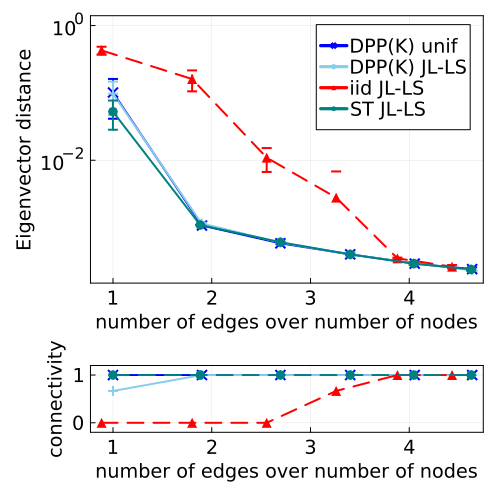

least eigenvalue of sparsifier: 0.0020469307594065847


GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE


"syncrank_err_MUNn2000p0.01eta0.1q0"

In [255]:
type = "MUN" 

rng = Random.default_rng()

# graph parameters
n = 2000# 2000
p = 0.01# 0.01
eta = 1e-1# 1e-3


# planted ranking score
planted_score = randperm(rng,n)

# graph model
if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 3 # number of runs

# regularization parameter
q = 0

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS",
    "iid JL-LS",
    # "iid LS",
    "ST JL-LS",
    # "ST LS",
]

D_results = benchmark_syncrank(meta_g,planted_score, n_batch, n_rep, rng; methods)

# plotting distance between eigenvectors
check_connected = true
metric= "err"
y_limits = (1.5*1e-4, 1.4)
legendposition=:topright
plot_comparison_sync(metric,D_results,y_limits;legendposition,methods,check_connected)
name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# # saving plot
# savefig("figures/"*name*".pdf")

# # saving results
# save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

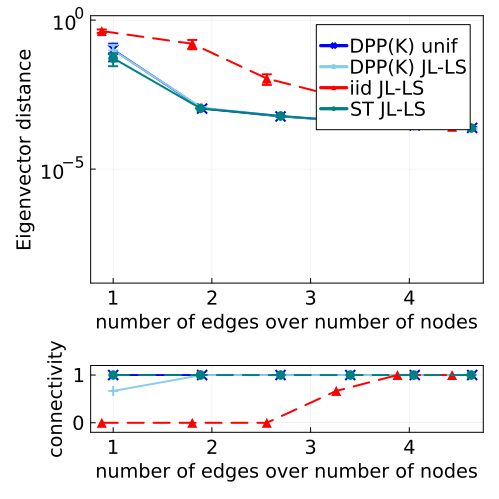

GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE


"syncrank_err_MUNn2000p0.01eta0.1q0"

In [256]:
# plotting distance between eigenvectors
check_connected = true
metric= "err"
y_limits = (1.5*1e-9, 1.4)
legendposition=:topright
plot_comparison_sync(metric,D_results,y_limits;legendposition,methods,check_connected)
name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

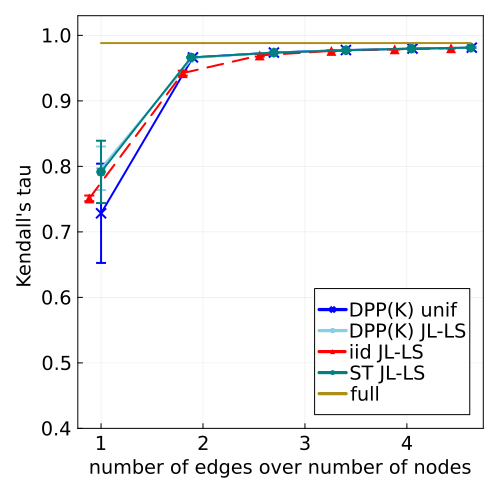

┌ Warning: Skipped yaxis arg linear
└ @ Plots /Users/mfanuel/.julia/packages/Plots/sxUvK/src/axes.jl:76


"syncrank_tau_MUNn2000p0.01eta0.1q0"

In [257]:
# plotting Kendall's tau between rankings

metric= "tau" 
y_limits = (0.4, 1.03)

legendposition=:bottomright
plot_comparison_sync(metric,D_results,y_limits;legendposition,methods)

name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
#savefig("figures/"*name*".pdf")

 ERO graph model

least eigval of Laplacian= 0.014139560614056901
k = 

342 vs nb edges= 4946
 
method: DPP(K) unif


least eigenvalue of sparsifier: 4.642813191018992e-5
least eigenvalue of sparsifier: 

0.005261282407902249


least eigenvalue of sparsifier: 0.010385370196225926
least eigenvalue of sparsifier: 

0.013397310908768941


least eigenvalue of sparsifier: 0.011853308994355542
least eigenvalue of sparsifier: 

0.012366360647171316


least eigenvalue of sparsifier: 0.013789260422861865
method: 

DPP(K) JL-LS


least eigenvalue of sparsifier: 2.2258832714650197e-5
least eigenvalue of sparsifier: 

0.008384600347217294


least eigenvalue of sparsifier: 0.010292781400454015
least eigenvalue of sparsifier: 

0.011652468527590411


least eigenvalue of sparsifier: 0.011377314631642767
least eigenvalue of sparsifier: 

0.011686459113602492


least eigenvalue of sparsifier: 0.013083065099627604
method: 

iid JL-LS
least eigenvalue of sparsifier: 1.037338598339495e-8
least eigenvalue of sparsifier: 

6.47098657927367e-6


least eigenvalue of sparsifier: 1.2509669655835112e-5
least eigenvalue of sparsifier: 

0.002175533805107899


least eigenvalue of sparsifier: 0.008354766421221833


least eigenvalue of sparsifier: 

0.010203139858426387


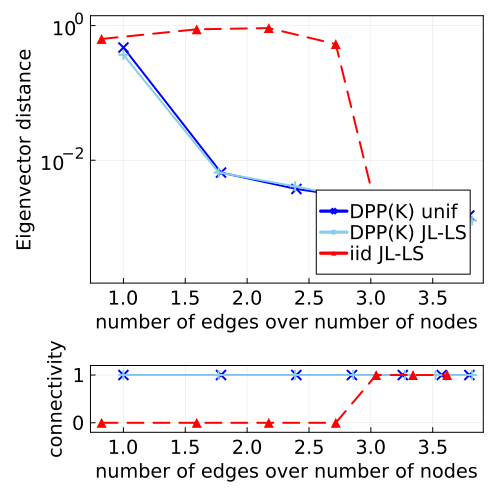

least eigenvalue of sparsifier: 0.010699938797123651


"syncrank_err_EROn1000p0.01eta0.02q0"

In [109]:
type = "ERO" 

rng = Random.default_rng()

# graph parameters
n = 1000
p = 0.01
eta = 0.02

# planted ranking score
planted_score = randperm(rng,n)

# graph model
if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# simulation parameters
n_batch = 7 # maximum number of batches considered
n_rep = 1 # number of runs

# regularization parameter
q = 0

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# print least eigenvalues
# B = magnetic_incidence(meta_g)
# l = eigvals(B' * B)
# println("least eigenvalue: ", l[1:3])

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS",
    "iid JL-LS",
    # "iid LS",
    #"ST JL-LS",
    # "ST LS",
]

check_connected = true
hkpv = false
D_results = benchmark_syncrank(meta_g,planted_score, n_batch, n_rep, rng; methods, hkpv)
# plotting distance between eigenvectors
metric= "err"
y_limits = (1.5*1e-4, 1.4)
legendposition=:bottomright
plot_comparison_sync(metric,D_results,y_limits;legendposition,methods,check_connected)
name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# # saving plot
# savefig("figures/"*name*".pdf")

# # saving results
# save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

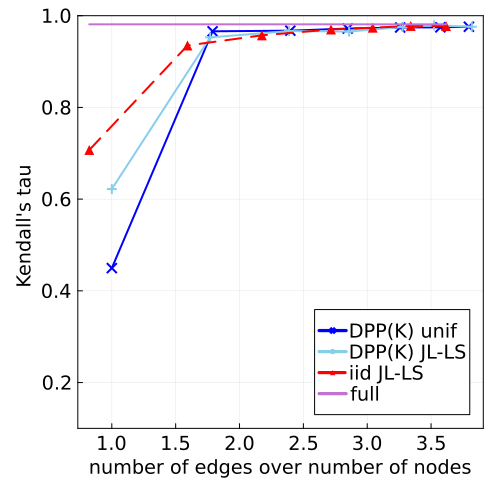

┌ Warning: Skipped yaxis arg linear
└ @ Plots /Users/mfanuel/.julia/packages/Plots/sxUvK/src/axes.jl:76


"syncrank_tau_EROn1000p0.01eta0.02q0"

In [110]:
# plotting Kendall's tau between rankings

metric= "tau" 

y_limits = (0.1, 1.)

legendposition=:bottomright
plot_comparison_sync(metric,D_results,y_limits;legendposition,methods)

name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
#savefig("figures/"*name*".pdf")

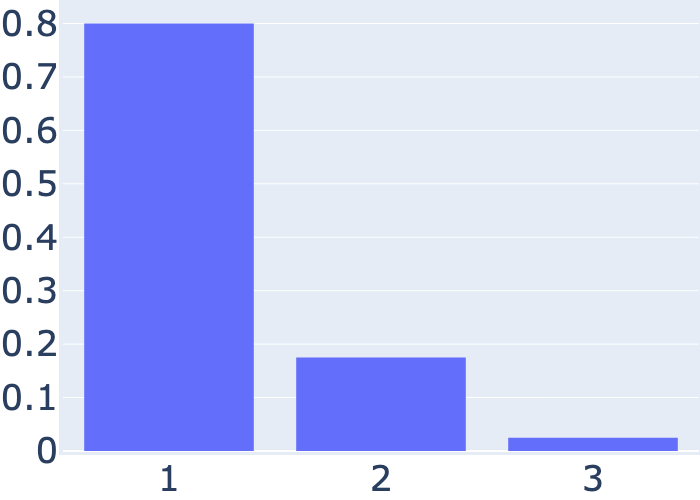

In [111]:
nb_samples = 200
nb_cycles = zeros(nb_samples)
mtsf_weight = zeros(nb_samples)

for i_sample in 1:nb_samples
    mtsf = multi_type_spanning_forest(rng, meta_g, q)

    # check nb roots and cycles
    cycles = get_prop(mtsf, :cycle_nodes)
    nb_cycles[i_sample] = length(cycles)
    D = props(mtsf)
    w = D[:weight]
    mtsf_weight[i_sample] = w
end    

cat_nb_cycles = string.(sort(Int.(nb_cycles)))
trace = PlotlyJS.histogram(x=cat_nb_cycles, histnorm="probability density")
layout = Layout(
    autosize=false,
    width=500,
    height=200,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=35,
    xaxis_type="category",
)
p = PlotlyJS.plot(trace,layout)

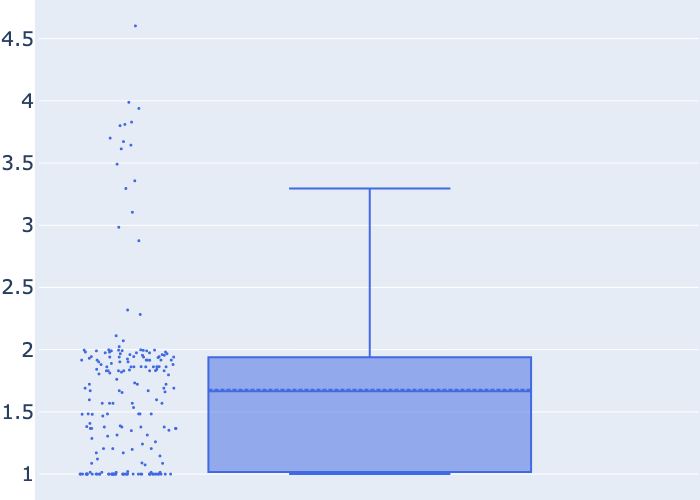

In [112]:
trace = box(y=(mtsf_weight),
boxpoints="all",
marker=attr(
        color="LightSkyBlue",
        size=3),
quartilemethod="linear",
name="",
marker_color="royalblue",
boxmean=true)

layout = Layout(
    autosize=false,
    width=500,
    height=200,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=20,
)
PlotlyJS.plot(trace,layout)

name = "syncrank_"*"weight_of_MTSF"*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

plt = PlotlyJS.plot(trace,layout)
#PlotlyJS.savefig(plt,"figures/"*name*".pdf")

SBM MUN


In [ ]:
rng = Random.default_rng()

# graph parameters
n = 400
p_in = 0.2
p_out = 0.001
η = 0.1
#noise = 0.3

# planted ranking score
planted_score = randperm(rng,n)


meta_g = MetaGraph(n)
ic = false
while !ic
    if type=="MUN"
        meta_g = ero_mun_sbm(rng,n,p_in,p_out,η,noise;planted_score)
    elseif type=="ERO"
        meta_g = ero_mun_sbm(rng,n,p_in,p_out,η,noise;planted_score)
    end
    ic = is_connected(meta_g)
end
println("connected graph generated with m/n = ", ne(meta_g) / nv(meta_g))



# simulation parameters
n_batch = 7 # maximum number of batches considered
n_rep = 1 # number of runs

# regularization parameter
q = 0

# # storing settings
# D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)


methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS",
    "iid JL-LS",
    # "iid LS",
    #"ST JL-LS",
    # "ST LS",
]

D_results = benchmark_syncrank(meta_g,planted_score, n_batch, n_rep, rng; methods)
# plotting distance between eigenvectors
metric= "err"
y_limits = (1.5*1e-4, 1.4)
legendposition=:topright
plot_comparison_sync(metric,D_results,y_limits;legendposition,methods)
name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
savefig("figures/"*name*".pdf")

In [ ]:
# plotting Kendall's tau between rankings

metric= "tau" 
y_limits = (1.5*1e-4, 1.1)

legendposition=:bottomright
plot_comparison_sync(metric,D_results,y_limits;legendposition,methods)

name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
savefig("figures/"*name*".pdf")